In [1]:
using Flux
using Flux: Data.DataLoader
using Flux: onehotbatch,onecold,crossentropy
using Flux: @epochs
using Statistics
using MLDatasets

In [2]:
x_train_temp,y_train_temp = MNIST.traindata();
x_test_temp,y_test_temp = MNIST.testdata();

In [3]:
println("The size of the training images are $(size(x_train_temp)) and the size of training labels is $(size(y_train_temp))")
print("The size of the testing images are $(size(x_test_temp)) and the size of testing labels is $(size(y_test_temp))")

The size of the training images are (28, 28, 60000) and the size of training labels is (60000,)
The size of the testing images are (28, 28, 10000) and the size of testing labels is (10000,)

In [5]:
x_train = Flux.unsqueeze(x_train_temp[:,:,1:5000],3)
x_test = Flux.unsqueeze(x_test_temp[1:1000],3)

y_train = onehotbatch(y_train_temp[1:5000],0:9)
y_test = onehotbatch(y_test_temp[1:1000],0:9)

#Displaying the updated shape of the elements

println("The size of the training images are $(size(x_train)) and the size of training labels is $(size(y_train))")
print("The size of the testing images are $(size(x_test)) and the size of testing labels is $(size(y_test))")

train_data = DataLoader(x_train, y_train, batchsize=128);

The size of the training images are (28, 28, 1, 1000) and the size of training labels is (10, 1000)
The size of the testing images are (28, 28, 1, 10000) and the size of testing labels is (10, 10000)

In [6]:
layer1 = Conv((3,3),1=>8,relu,stride=2)
layer2 = Conv((3,3),8=>16,relu)
layer3 = Conv((3,3),16=>32,relu)
layer4 = GlobalMaxPool()
layer5 = flatten
layer6 = Dense(32,10)
layer7 = softmax;

In [7]:
layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]
x = x_train

for l in layers
    println("The layer is $l")
    println("The size of the input layer is $(size(x))")
    x = l(x)
    println("The size of the output layer is $(size(x))")
    println("-"^30)
end

The layer is Conv((3, 3), 1=>8, relu)
The size of the input layer is (28, 28, 1, 1000)


┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float32
│   T1 = FixedPointNumbers.Normed{UInt8,8}
│   T2 = Float32
└ @ NNlib C:\Users\Saad.LAKES\.julia\packages\NNlib\fxLrD\src\conv.jl:206


The size of the output layer is (13, 13, 8, 1000)
------------------------------
The layer is Conv((3, 3), 8=>16, relu)
The size of the input layer is (13, 13, 8, 1000)
The size of the output layer is (11, 11, 16, 1000)
------------------------------
The layer is Conv((3, 3), 16=>32, relu)
The size of the input layer is (11, 11, 16, 1000)
The size of the output layer is (9, 9, 32, 1000)
------------------------------
The layer is GlobalMaxPool()
The size of the input layer is (9, 9, 32, 1000)
The size of the output layer is (1, 1, 32, 1000)
------------------------------
The layer is flatten
The size of the input layer is (1, 1, 32, 1000)
The size of the output layer is (32, 1000)
------------------------------
The layer is Dense(32, 10)
The size of the input layer is (32, 1000)
The size of the output layer is (10, 1000)
------------------------------
The layer is softmax
The size of the input layer is (10, 1000)
The size of the output layer is (10, 1000)
------------------------------

In [11]:
model = Chain(layer1, layer2, layer3, layer4, layer5,layer6, layer7)
L(x,y) = Flux.crossentropy(model(x),y)
opt = Flux.Optimise.ADAM()
ps = Flux.params(model)
training_loss = Vector{Float64}()
validation_loss = Vector{Float64}()

training_accuracy= Vector{Float64}()
validation_accuracy = Vector{Float64}()

println(size(training_loss))
println(size(validation_loss))

total_step = 10

for step in 1:total_step
    Flux.train!(L,ps,train_data,opt)
    println("EPOCH NUMBER: $step")
    println("Training Loss is $(L(x_train,y_train))")
    println("Validation Loss is $(L(x_test,y_test))")
    println("-"^50)
    push!(training_loss,L(x_train,y_train))
    push!(validation_loss,L(x_test,y_test))
    
    push!(training_accuracy,L(x_train,y_train))
    push!(validation_loss,L(x_test,y_test))
end

(0,)
(0,)
EPOCH NUMBER: 1
Training Loss is 0.003175072
Validation Loss is 0.4989194
--------------------------------------------------
EPOCH NUMBER: 2
Training Loss is 0.0033194362
Validation Loss is 0.5593905
--------------------------------------------------
EPOCH NUMBER: 3
Training Loss is 0.0012674299
Validation Loss is 0.4932403
--------------------------------------------------
EPOCH NUMBER: 4
Training Loss is 0.0013219134
Validation Loss is 0.49928126
--------------------------------------------------
EPOCH NUMBER: 5
Training Loss is 0.0010939803
Validation Loss is 0.5000735
--------------------------------------------------
EPOCH NUMBER: 6
Training Loss is 0.0008220038
Validation Loss is 0.5133418
--------------------------------------------------
EPOCH NUMBER: 7
Training Loss is 0.00069804705
Validation Loss is 0.5000725
--------------------------------------------------
EPOCH NUMBER: 8
Training Loss is 0.00065004907
Validation Loss is 0.48983467
------------------------------

In [12]:
println(size(training_loss))
println(size(validation_loss))

(10,)
(10,)


In [15]:
using Plots

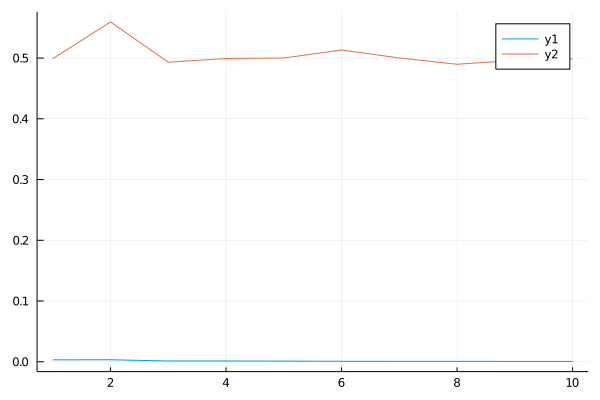

In [30]:
plot(1:total_step,loss,legend=true)
# plot!(1:total_step,validation_loss,legend=true)

In [28]:
loss = hcat(training_loss,validation_loss)
size(loss)

(10, 2)

In [126]:
length.(x_train_temp)

28×28×60000 Array{Int64,3}:
[:, :, 1] =
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1 